<a href="https://colab.research.google.com/github/AlexFMo/statistical-process-control/blob/main/SPS_case_studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Statistical Process Control - Case studies**

Case Study 1. Process Downtimes

Case Study 2. %NG

Case Study 3. Errors in 2 weeks

Case Study 4. Reasons for leaving

Case Study 5. Battery Capacity

Case Study 6. Temperature CT Room QC Lab

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Case Study 1. Process Downtimes


In [4]:
url_process_downtime = 'https://github.com/AlexFMo/statistical-process-control/raw/refs/heads/main/files/Imported%20Excel%20File.xlsx'
data_process_downtime = pd.read_excel(url_process_downtime, header = 1)
data_process_downtime.head()

,Time Operation 1,Time Operation 2,Time Operation 3,Total Times
0,30.005306,30.594611,30.403448,91.003364
1,28.844357,30.159462,30.579663,89.583482
2,31.973042,27.939058,28.589332,88.501432
3,31.088777,29.739512,29.650302,90.478592
4,29.722299,30.893330,31.256002,91.871631


## Case Study 2. %NG


In [5]:
url_ng = 'https://github.com/AlexFMo/statistical-process-control/raw/refs/heads/main/files/battery_data_exercises.xlsx'
data_ng = pd.read_excel(url_ng, sheet_name='Sheet2')
data_ng.head()

,Shift,Speed,Press Height,%NG
0,1,60,25,1.83
1,1,80,25,4.70
2,1,80,25,4.32
3,1,80,35,3.50
4,1,80,35,4.60


## Case Study 3. Errors in 2 weeks

In [6]:
url_errors_per_week = 'https://github.com/AlexFMo/statistical-process-control/raw/refs/heads/main/files/battery_data_exercises.xlsx'
data_errors_per_week = pd.read_excel(url_errors_per_week, sheet_name='Sheet3')
data_errors_per_week.head()

,Errors Detected in the Process,Total number of Defects 2wks
0,Anode tab length NG,106
1,Anode welding defect (bottom) NG,44
2,Anode welding defect (top) NG,79
3,Cathode tab length NG,75
4,Cathode welding defect (bottom) NG,59


## Case Study 4. Reasons for leaving

In [8]:
url_reasons = 'https://github.com/AlexFMo/statistical-process-control/raw/refs/heads/main/files/battery_data_exercises.xlsx'
data_reasons = pd.read_excel(url_reasons, sheet_name='Sheet4')
data_reasons.head()

,Facility,Reason for Leaving
0,Labs,Money
1,Labs,Money
2,Labs,Stress
3,Labs,Money
4,Labs,Money


## Case Study 5. Battery Capacity


* The customer has requested  to make a study of the remaining battery capacity and see if it is correlating to the mileage used.
* Data was captured from different customers, and analysed with Minitab.
* Use the data to determine if there is a positive, negative, or no correlation.


In [155]:
url_battery_capacity = 'https://github.com/AlexFMo/statistical-process-control/raw/refs/heads/main/files/battery_data_exercises.xlsx'
data_battery_capacity = pd.read_excel(url_battery_capacity, sheet_name='Sheet5')
data_battery_capacity.head()

,Mileage,Remaining Battery Capacity
0,2113,1.015190
1,16800,0.987755
2,15845,0.964206
3,37352,0.976636
4,821,1.016000


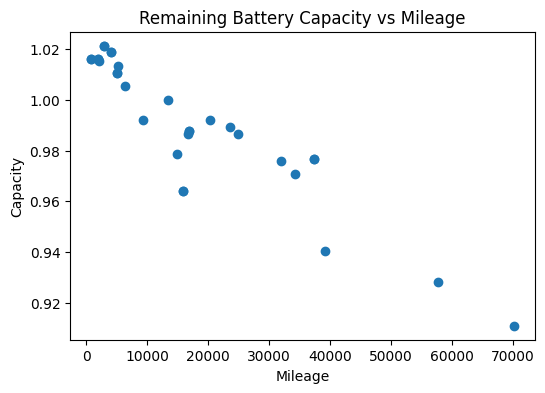

In [156]:
data = data_battery_capacity
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(data['Mileage'], data['Remaining Battery Capacity'])
ax.set_xlabel('Mileage')
ax.set_ylabel('Capacity')
plt.title('Remaining Battery Capacity vs Mileage')
plt.show()

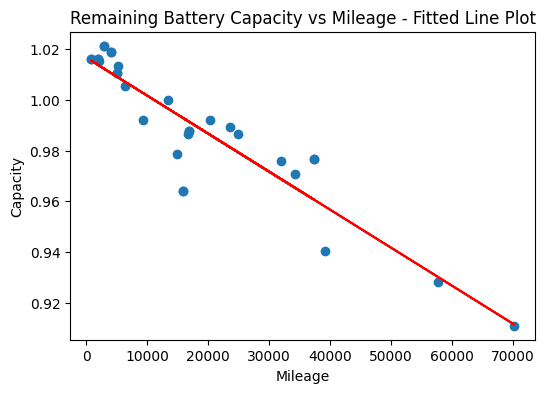

In [157]:
# Calculate the linear regression line
x = data['Mileage']
y = data['Remaining Battery Capacity']
slope, intercept = np.polyfit(x, y, 1)
line = slope * x + intercept

# Plot the scatter plot and the fitted line
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x, y)
ax.plot(x, line, color='red')
ax.set_xlabel('Mileage')
ax.set_ylabel('Capacity')
plt.title('Remaining Battery Capacity vs Mileage - Fitted Line Plot')
plt.show()


In [158]:
print(f'Remaining Battery Capacity = {round(intercept,3)} {round(slope,7)} * Mileage ')


Remaining Battery Capacity = 1.017 -1.5e-06 * Mileage 


In [162]:
# R square https://data36.com/linear-regression-in-python-numpy-polyfit/
# Mean Squared Error https://www.geeksforgeeks.org/python-mean-squared-error/

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = np.polyfit(x,y,1)
predict = np.poly1d(model)

# R-squared
r_squared = r2_score(y, predict(x))
print(f'R squared: {round(r_squared,4)}')

# Adjusted R-squared (calculated manually)
n = len(y)  # number of data points / observations / sample size
# p = x.shape[1] - 1  # number of predictors (excluding intercept)  /  from example with more than 1 feature
p = x.ndim  # number of predictors(features)  /  only 1 feature in this example
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r_squared)

# RMSE
# rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse = np.sqrt(mean_squared_error(y,predict(x)))
print("Root Mean Squared Error (RMSE):", rmse)

# # MAE
# # mae = mean_absolute_error(y, y_pred)
mae = mean_absolute_error(y, predict(x))
print("Mean Absolute Error (MAE):", mae)

# mileage = 50000
# predict(mileage)

R squared: 0.8536
Adjusted R-squared: 0.8485884866974128
Root Mean Squared Error (RMSE): 0.010565480513465186
Mean Absolute Error (MAE): 0.007618488044822071


In [161]:
# y = ax + b
a = model[0]
b = model[1]
print(f'Remaining Battery Capacity = {round(b,3)} {round(a,7)} * Mileage ')
  # Equation rearranged to y = b - ax due to negative value in a

Remaining Battery Capacity = 1.017 -1.5e-06 * Mileage 


In [64]:
predict(x)

array([1.01348229, 0.99148822, 0.99291835, 0.9607112 , 1.01541708,
       1.01370242, 1.01222437, 1.01059807, 1.00920238, 1.0088295 ,
       1.00711933, 1.00273609, 0.99651539, 0.99431404, 0.99152266,
       0.9863113 , 0.98142639, 0.9794257 , 0.96872443, 0.96528163,
       0.93005997, 0.91149073, 0.95802465, 0.99148822, 0.99291835,
       0.9607112 , 1.01541708, 1.01370242, 1.01222437, 1.01059807,
       1.00920238])

In [87]:
# check how to get this in python
S: The error (standard deviation)
# R-Sq: How much can we explain based on this model.  Done
# R-Sq (adj): Use adjusted R-sq when you want to compare models that have different numbers of predictors.  Done

## DataCamp example to understand Linear Regression in Python

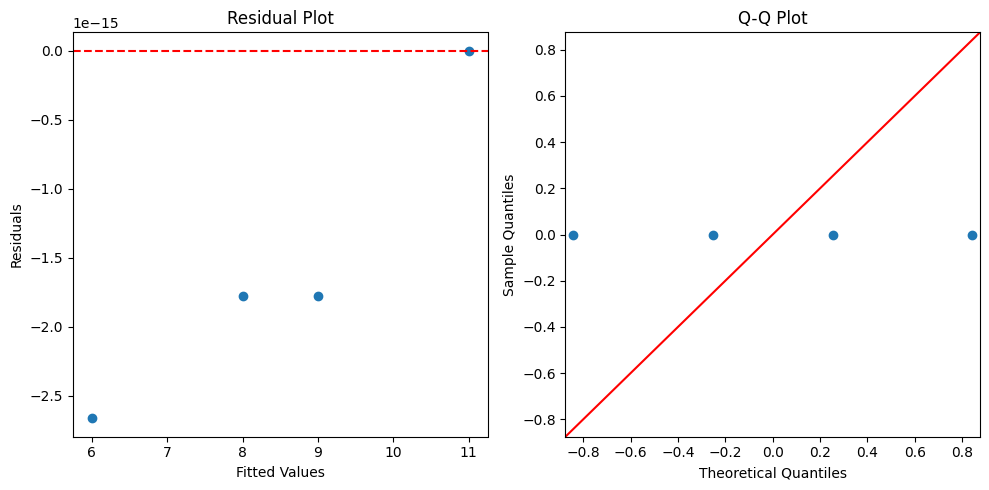

In [146]:
# https://www.datacamp.com/tutorial/linear-regression-in-python
# Linear Regression in Python: Your Guide to Predictive Modeling

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Sample data and linear regression model
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])  # Independent variables
# X = np.array([1, 1, 2, 3])  # Independent variables
y = np.array([6, 8, 9, 11])  # Dependent variable

# Add an intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid

# 1. Residual Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# 2. Q-Q Plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line ='45', ax=plt.gca())
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions using the model
y_pred = model.predict(X)

# R-squared
r_squared = r2_score(y, y_pred)
print("R-squared:", r_squared)

# Adjusted R-squared (calculated manually)
n = len(y)  # number of data points
p = X.shape[1] - 1  # number of predictors (excluding intercept)
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r_squared)

# RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# MAE
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

R-squared: 1.0
Adjusted R-squared: 1.0
Root Mean Squared Error (RMSE): 1.831026719408895e-15
Mean Absolute Error (MAE): 1.5543122344752192e-15


In [147]:
model.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.847e+29
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.02e-15
Time:                        08:11:29   Log-Likelihood:                 130.06
No. Observations:                   4   AIC:                            -254.1
Df Residuals:                       1   BIC:                            -256.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0000   6.07e-15   4.94e+14      0.000       3.000       3.000
x1             1.0000   5.18e-15   1.93e+14      0.000       1.000       1.000
x2             2.0000   3.66e-15   5.46e+14      0.000       2.000       2.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.294
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.419
Skew:                           0.652   Prob(JB):                        0.811
Kurtosis:                       2.097   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
# Extract values from sm model sumamry
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html

print(model.rsquared)
print(model.pvalues)
print(model.fvalue)

1.0
[1.28869426e-15 3.29700646e-15 1.16566781e-15]
4.846899353813818e+29


## Case Study 6. Temperature CT Room QC Lab

In [9]:
url_temp_ct_room = 'https://github.com/AlexFMo/statistical-process-control/raw/refs/heads/main/files/battery_data_exercises.xlsx'
data_temp_ct_room = pd.read_excel(url_temp_ct_room, sheet_name='Sheet6')
data_temp_ct_room.head()

,Temperature CT Room QC Lab
0,24.51
1,24.63
2,24.72
3,24.79
4,24.92
